In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import roc_curve, auc

In [2]:
# Lire les données
clinicalInput = pd.read_excel(Path("Balanced Data Set.xlsx"))


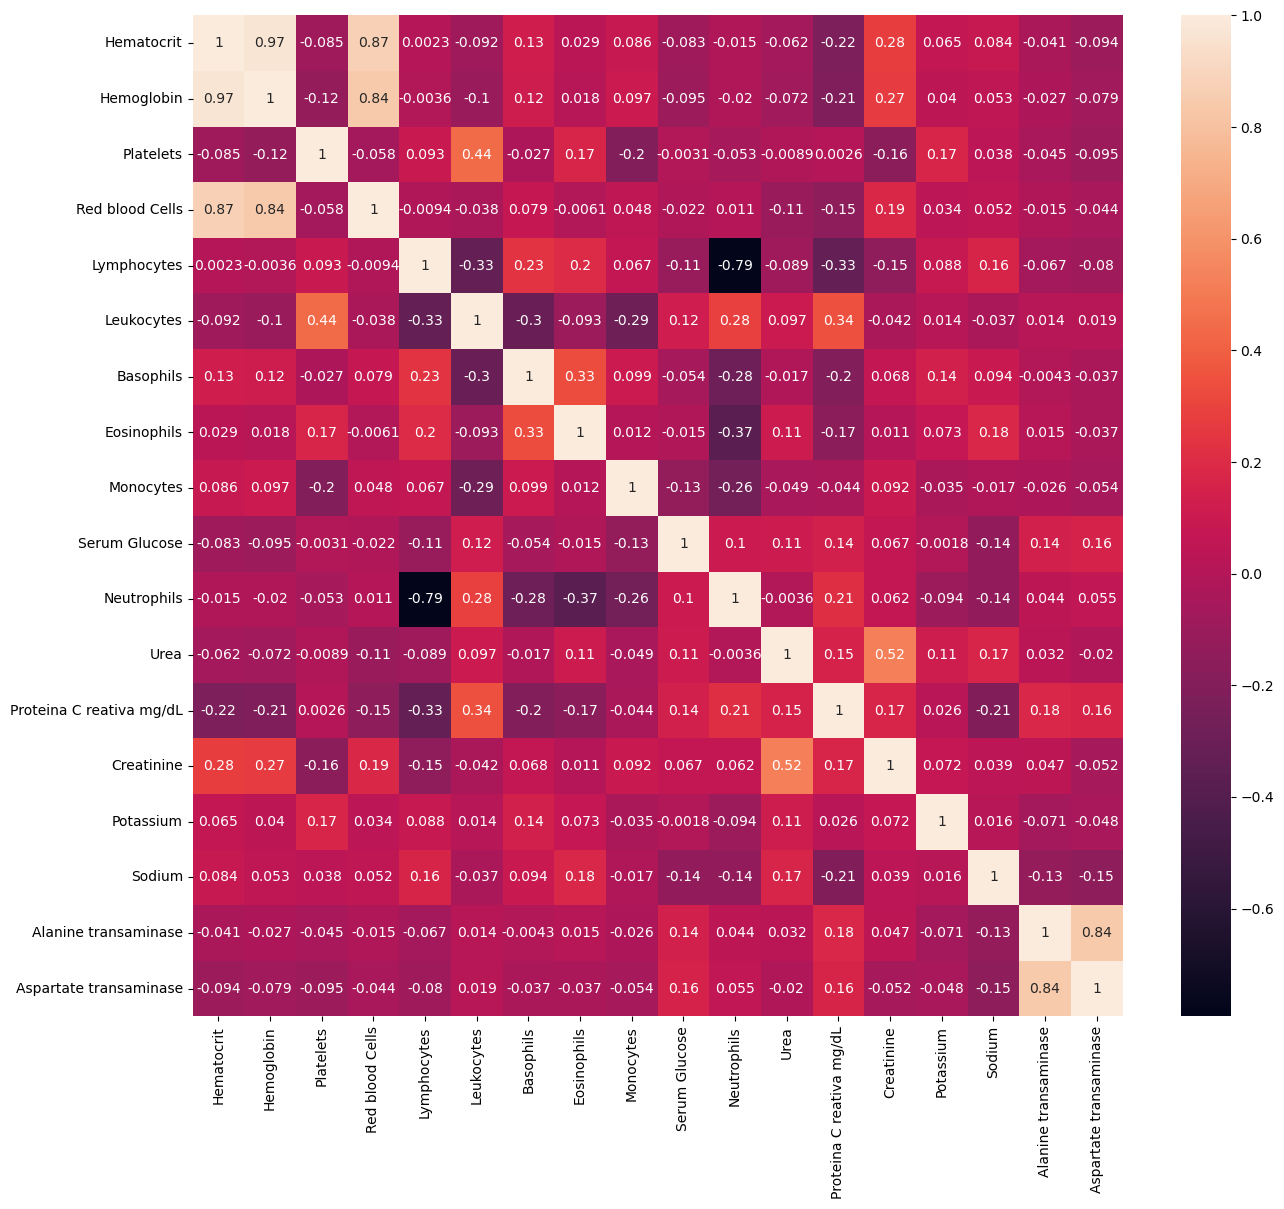

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_df = clinicalInput.corr(method='pearson', numeric_only=False)

plt.figure(figsize=(15, 13))
sns.heatmap(corr_df, annot=True)
plt.show()

In [4]:
clinicalInput.head()

,Patient ID,Patient age quantile,Hematocrit,Hemoglobin,Platelets,Red blood Cells,Lymphocytes,Leukocytes,Basophils,Eosinophils,...,Serum Glucose,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,Alanine transaminase,Aspartate transaminase,Label
0,126e9dd13932f68,17,0.236515,-0.022340,-0.517413,0.102004,0.318366,-0.094610,-0.223767,1.482158,...,-0.140648,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,0.000000,0.000000,0
1,8bb9d64f0215244,1,-1.571682,-0.774212,1.429667,-0.850035,-0.005738,0.364550,-0.223767,1.018625,...,-0.413208,-0.127395,-0.067309,-0.286986,-1.838623,0.930020,0.503132,-0.586821,-0.162200,0
2,6c9d3323975b082,9,-0.747693,-0.586244,-0.429480,-1.361315,-1.114514,-0.884923,0.081693,-0.666950,...,0.000000,0.880570,-0.811643,0.000000,-0.908177,0.435697,-0.215628,-0.559257,-0.549287,0
3,d3ea751f3db9de9,11,0.991838,0.792188,0.072992,0.542763,0.045436,-0.211488,-0.834685,-0.709090,...,0.000000,0.265957,0.000000,-0.487674,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,2c2eae16c12a18a,9,0.190738,-0.147652,-0.668155,-0.127191,0.002791,-1.132592,0.387152,-0.709090,...,-0.837191,-0.422410,-1.332677,0.000000,-0.908177,-0.552949,-0.575008,0.000000,0.000000,0


In [5]:
print (clinicalInput.shape)

(600, 21)


In [6]:
clinicalInput.describe()

,Patient age quantile,Hematocrit,Hemoglobin,Platelets,Red blood Cells,Lymphocytes,Leukocytes,Basophils,Eosinophils,Monocytes,Serum Glucose,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,Alanine transaminase,Aspartate transaminase,Label
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,11.121667,0.002327,0.002096,0.005162,0.002987,-0.000910,0.003613,0.000610,0.002071,-0.005640,-0.001702,0.001812,0.000201,0.004179,0.000368,0.000391,-0.001797,0.000880,-0.000790,0.133333
std,5.722013,1.002781,1.002825,0.998923,1.001409,1.001834,1.000907,1.002101,1.001635,0.995438,0.586704,0.924594,0.813257,0.918151,0.834150,0.785297,0.780069,0.611631,0.613318,0.340218
min,0.000000,-4.501420,-4.345603,-2.552426,-3.970608,-1.865070,-2.020303,-1.140144,-0.835508,-2.163721,-1.109751,-3.339775,-1.630410,-0.535362,-2.389999,-2.283079,-5.246946,-0.641951,-0.704122,0.000000
25%,6.750000,-0.524530,-0.586244,-0.605346,-0.567950,-0.732839,-0.637255,-0.529226,-0.666950,-0.614192,0.000000,-0.571966,-0.365042,-0.501583,-0.391262,-0.305787,-0.215628,-0.063092,-0.123491,0.000000
50%,12.000000,0.053407,0.040316,-0.102873,0.013852,-0.014267,-0.208705,-0.223767,-0.329835,-0.115191,0.000000,0.000000,0.000000,-0.300895,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.000000,0.717175,0.729532,0.537779,0.670583,0.593427,0.457078,0.387152,0.344395,0.488863,0.000000,0.515900,0.081558,0.000000,0.263496,0.188535,0.143752,0.000000,0.000000,0.000000
max,19.000000,2.662704,2.671868,9.532034,3.645706,3.764100,4.522042,11.078219,8.350876,4.533397,7.006488,2.535929,11.246569,8.026671,5.053572,3.401635,4.096930,7.930663,7.231172,1.000000


In [7]:
clinicalInput.isnull().sum()

Patient ID                  0
Patient age quantile        0
Hematocrit                  0
Hemoglobin                  0
Platelets                   0
Red blood Cells             0
Lymphocytes                 0
Leukocytes                  0
Basophils                   0
Eosinophils                 0
Monocytes                   0
Serum Glucose               0
Neutrophils                 0
Urea                        0
Proteina C reativa mg/dL    0
Creatinine                  0
Potassium                   0
Sodium                      0
Alanine transaminase        0
Aspartate transaminase      0
Label                       0
dtype: int64

In [8]:
clinicalInput.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient ID                600 non-null    object 
 1   Patient age quantile      600 non-null    int64  
 2   Hematocrit                600 non-null    float64
 3   Hemoglobin                600 non-null    float64
 4   Platelets                 600 non-null    float64
 5   Red blood Cells           600 non-null    float64
 6   Lymphocytes               600 non-null    float64
 7   Leukocytes                600 non-null    float64
 8   Basophils                 600 non-null    float64
 9   Eosinophils               600 non-null    float64
 10  Monocytes                 600 non-null    float64
 11  Serum Glucose             600 non-null    float64
 12  Neutrophils               600 non-null    float64
 13  Urea                      600 non-null    float64
 14  Proteina C

In [9]:



# Encodage des labels
le = LabelEncoder().fit(clinicalInput.Label)
labels = le.transform(clinicalInput.Label)
classes = list(le.classes_)

# Préparation des données
clinicalInput = clinicalInput.drop(["Patient ID", "Patient age quantile","Label"], axis=1)
# determiner le nombre de fonctionnalités et de classes
nb_features = 18
nb_classes = len(classes)

# Standardisation des données
scaler = StandardScaler().fit(clinicalInput.values)
train = scaler.transform(clinicalInput.values)

# Séparation des données d'entraînement et de validation
X_train, X_valid, y_train, y_valid = train_test_split(clinicalInput, labels, test_size=0.2)

# Conversion des données numériques en un vecteur one hot
y_train = tf.keras.utils.to_categorical(y_train)
y_valid = tf.keras.utils.to_categorical(y_valid)

# Redimensionnement des données d'entrée
X_train = np.array(X_train).reshape(480, 18, 1)
X_valid = np.array(X_valid).reshape(120, 18, 1)

# Définition du modèle
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.SimpleRNN(512, input_shape=(nb_features, 1)))
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(2048, activation="relu"))
model.add(tf.keras.layers.Dense(1024, activation="relu"))
model.add(tf.keras.layers.Dense(nb_classes, activation="softmax")) 

# Définition de la fonction de perte et de l'optimiseur
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.optimizers import SGD
initial_learning_rate = 0.1
decay_steps = 10000
decay_rate = 0.1
lr_schedule = ExponentialDecay(
    initial_learning_rate,
    decay_steps=decay_steps,
    decay_rate=decay_rate,
    staircase=True)

opt = SGD(learning_rate=lr_schedule)


from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))




#compile the model
model.compile(loss="binary_crossentropy", optimizer = opt, metrics=["accuracy",f1_m,precision_m,recall_m])

#run the model
score = model.fit(X_train, y_train, epochs = 250, validation_data=(X_valid,y_valid))

y_score = model.predict((X_valid))

Epoch 1/250
15/15 [==============================] - 2s 49ms/step - loss: 0.3832 - accuracy: 0.8438 - f1_m: 0.8437 - precision_m: 0.8438 - recall_m: 0.8438 - val_loss: 0.5397 - val_accuracy: 0.9000 - val_f1_m: 0.8958 - val_precision_m: 0.8958 - val_recall_m: 0.8958
Epoch 2/250
15/15 [==============================] - 0s 22ms/step - loss: 0.3206 - accuracy: 0.8646 - f1_m: 0.8646 - precision_m: 0.8646 - recall_m: 0.8646 - val_loss: 0.4823 - val_accuracy: 0.9167 - val_f1_m: 0.9219 - val_precision_m: 0.9219 - val_recall_m: 0.9219
Epoch 3/250
15/15 [==============================] - 0s 22ms/step - loss: 0.3057 - accuracy: 0.8792 - f1_m: 0.8792 - precision_m: 0.8792 - recall_m: 0.8792 - val_loss: 0.4662 - val_accuracy: 0.8917 - val_f1_m: 0.8880 - val_precision_m: 0.8880 - val_recall_m: 0.8880
Epoch 4/250
15/15 [==============================] - 0s 22ms/step - loss: 0.2823 - accuracy: 0.8792 - f1_m: 0.8792 - precision_m: 0.8792 - recall_m: 0.8792 - val_loss: 0.4104 - val_accuracy: 0.8750 - va

Epoch 32/250
15/15 [==============================] - 0s 22ms/step - loss: 0.1941 - accuracy: 0.9187 - f1_m: 0.9187 - precision_m: 0.9187 - recall_m: 0.9187 - val_loss: 0.3646 - val_accuracy: 0.8417 - val_f1_m: 0.8411 - val_precision_m: 0.8411 - val_recall_m: 0.8411
Epoch 33/250
15/15 [==============================] - 0s 23ms/step - loss: 0.1660 - accuracy: 0.9229 - f1_m: 0.9229 - precision_m: 0.9229 - recall_m: 0.9229 - val_loss: 0.3790 - val_accuracy: 0.8250 - val_f1_m: 0.8281 - val_precision_m: 0.8281 - val_recall_m: 0.8281
Epoch 34/250
15/15 [==============================] - 0s 23ms/step - loss: 0.1320 - accuracy: 0.9438 - f1_m: 0.9437 - precision_m: 0.9438 - recall_m: 0.9438 - val_loss: 0.3707 - val_accuracy: 0.8083 - val_f1_m: 0.8073 - val_precision_m: 0.8073 - val_recall_m: 0.8073
Epoch 35/250
15/15 [==============================] - 0s 23ms/step - loss: 0.1979 - accuracy: 0.9000 - f1_m: 0.9000 - precision_m: 0.9000 - recall_m: 0.9000 - val_loss: 0.3243 - val_accuracy: 0.8833 

Epoch 63/250
15/15 [==============================] - 0s 22ms/step - loss: 0.0366 - accuracy: 0.9917 - f1_m: 0.9917 - precision_m: 0.9917 - recall_m: 0.9917 - val_loss: 0.4786 - val_accuracy: 0.8750 - val_f1_m: 0.8776 - val_precision_m: 0.8776 - val_recall_m: 0.8776
Epoch 64/250
15/15 [==============================] - 0s 22ms/step - loss: 0.0509 - accuracy: 0.9750 - f1_m: 0.9750 - precision_m: 0.9750 - recall_m: 0.9750 - val_loss: 0.4954 - val_accuracy: 0.8667 - val_f1_m: 0.8620 - val_precision_m: 0.8620 - val_recall_m: 0.8620
Epoch 65/250
15/15 [==============================] - 0s 22ms/step - loss: 0.0643 - accuracy: 0.9729 - f1_m: 0.9729 - precision_m: 0.9729 - recall_m: 0.9729 - val_loss: 0.3465 - val_accuracy: 0.8833 - val_f1_m: 0.8854 - val_precision_m: 0.8854 - val_recall_m: 0.8854
Epoch 66/250
15/15 [==============================] - 0s 22ms/step - loss: 0.1279 - accuracy: 0.9563 - f1_m: 0.9563 - precision_m: 0.9563 - recall_m: 0.9563 - val_loss: 0.5333 - val_accuracy: 0.8417 

Epoch 94/250
15/15 [==============================] - 0s 22ms/step - loss: 0.0280 - accuracy: 0.9875 - f1_m: 0.9875 - precision_m: 0.9875 - recall_m: 0.9875 - val_loss: 0.4232 - val_accuracy: 0.8833 - val_f1_m: 0.8828 - val_precision_m: 0.8828 - val_recall_m: 0.8828
Epoch 95/250
15/15 [==============================] - 0s 22ms/step - loss: 0.0108 - accuracy: 0.9958 - f1_m: 0.9958 - precision_m: 0.9958 - recall_m: 0.9958 - val_loss: 0.4257 - val_accuracy: 0.8917 - val_f1_m: 0.8906 - val_precision_m: 0.8906 - val_recall_m: 0.8906
Epoch 96/250
15/15 [==============================] - 0s 22ms/step - loss: 0.0063 - accuracy: 1.0000 - f1_m: 1.0000 - precision_m: 1.0000 - recall_m: 1.0000 - val_loss: 0.4272 - val_accuracy: 0.8833 - val_f1_m: 0.8828 - val_precision_m: 0.8828 - val_recall_m: 0.8828
Epoch 97/250
15/15 [==============================] - 0s 22ms/step - loss: 0.0031 - accuracy: 1.0000 - f1_m: 1.0000 - precision_m: 1.0000 - recall_m: 1.0000 - val_loss: 0.4300 - val_accuracy: 0.8917 

15/15 [==============================] - 0s 22ms/step - loss: 6.0969e-04 - accuracy: 1.0000 - f1_m: 1.0000 - precision_m: 1.0000 - recall_m: 1.0000 - val_loss: 0.4965 - val_accuracy: 0.8917 - val_f1_m: 0.8906 - val_precision_m: 0.8906 - val_recall_m: 0.8906
Epoch 125/250
15/15 [==============================] - 0s 22ms/step - loss: 4.6430e-04 - accuracy: 1.0000 - f1_m: 1.0000 - precision_m: 1.0000 - recall_m: 1.0000 - val_loss: 0.4981 - val_accuracy: 0.8917 - val_f1_m: 0.8906 - val_precision_m: 0.8906 - val_recall_m: 0.8906
Epoch 126/250
15/15 [==============================] - 0s 22ms/step - loss: 5.1231e-04 - accuracy: 1.0000 - f1_m: 1.0000 - precision_m: 1.0000 - recall_m: 1.0000 - val_loss: 0.4991 - val_accuracy: 0.8917 - val_f1_m: 0.8906 - val_precision_m: 0.8906 - val_recall_m: 0.8906
Epoch 127/250
15/15 [==============================] - 0s 22ms/step - loss: 5.6332e-04 - accuracy: 1.0000 - f1_m: 1.0000 - precision_m: 1.0000 - recall_m: 1.0000 - val_loss: 0.4989 - val_accuracy: 0

15/15 [==============================] - 0s 25ms/step - loss: 4.2911e-04 - accuracy: 1.0000 - f1_m: 1.0000 - precision_m: 1.0000 - recall_m: 1.0000 - val_loss: 0.5312 - val_accuracy: 0.8833 - val_f1_m: 0.8828 - val_precision_m: 0.8828 - val_recall_m: 0.8828
Epoch 155/250
15/15 [==============================] - 0s 24ms/step - loss: 2.7433e-04 - accuracy: 1.0000 - f1_m: 1.0000 - precision_m: 1.0000 - recall_m: 1.0000 - val_loss: 0.5320 - val_accuracy: 0.8833 - val_f1_m: 0.8828 - val_precision_m: 0.8828 - val_recall_m: 0.8828
Epoch 156/250
15/15 [==============================] - 0s 25ms/step - loss: 4.3746e-04 - accuracy: 1.0000 - f1_m: 1.0000 - precision_m: 1.0000 - recall_m: 1.0000 - val_loss: 0.5279 - val_accuracy: 0.8833 - val_f1_m: 0.8828 - val_precision_m: 0.8828 - val_recall_m: 0.8828
Epoch 157/250
15/15 [==============================] - 0s 23ms/step - loss: 3.5621e-04 - accuracy: 1.0000 - f1_m: 1.0000 - precision_m: 1.0000 - recall_m: 1.0000 - val_loss: 0.5291 - val_accuracy: 0

15/15 [==============================] - 0s 23ms/step - loss: 1.7718e-04 - accuracy: 1.0000 - f1_m: 1.0000 - precision_m: 1.0000 - recall_m: 1.0000 - val_loss: 0.5482 - val_accuracy: 0.8917 - val_f1_m: 0.8906 - val_precision_m: 0.8906 - val_recall_m: 0.8906
Epoch 185/250
15/15 [==============================] - 0s 23ms/step - loss: 2.9784e-04 - accuracy: 1.0000 - f1_m: 1.0000 - precision_m: 1.0000 - recall_m: 1.0000 - val_loss: 0.5485 - val_accuracy: 0.8917 - val_f1_m: 0.8906 - val_precision_m: 0.8906 - val_recall_m: 0.8906
Epoch 186/250
15/15 [==============================] - 0s 22ms/step - loss: 1.5371e-04 - accuracy: 1.0000 - f1_m: 1.0000 - precision_m: 1.0000 - recall_m: 1.0000 - val_loss: 0.5523 - val_accuracy: 0.8917 - val_f1_m: 0.8906 - val_precision_m: 0.8906 - val_recall_m: 0.8906
Epoch 187/250
15/15 [==============================] - 0s 22ms/step - loss: 1.4922e-04 - accuracy: 1.0000 - f1_m: 1.0000 - precision_m: 1.0000 - recall_m: 1.0000 - val_loss: 0.5532 - val_accuracy: 0

15/15 [==============================] - 0s 23ms/step - loss: 1.5755e-04 - accuracy: 1.0000 - f1_m: 1.0000 - precision_m: 1.0000 - recall_m: 1.0000 - val_loss: 0.5662 - val_accuracy: 0.8750 - val_f1_m: 0.8724 - val_precision_m: 0.8724 - val_recall_m: 0.8724
Epoch 215/250
15/15 [==============================] - 0s 22ms/step - loss: 1.0828e-04 - accuracy: 1.0000 - f1_m: 1.0000 - precision_m: 1.0000 - recall_m: 1.0000 - val_loss: 0.5671 - val_accuracy: 0.8750 - val_f1_m: 0.8724 - val_precision_m: 0.8724 - val_recall_m: 0.8724
Epoch 216/250
15/15 [==============================] - 0s 23ms/step - loss: 1.7712e-04 - accuracy: 1.0000 - f1_m: 1.0000 - precision_m: 1.0000 - recall_m: 1.0000 - val_loss: 0.5656 - val_accuracy: 0.8750 - val_f1_m: 0.8724 - val_precision_m: 0.8724 - val_recall_m: 0.8724
Epoch 217/250
15/15 [==============================] - 0s 22ms/step - loss: 1.2125e-04 - accuracy: 1.0000 - f1_m: 1.0000 - precision_m: 1.0000 - recall_m: 1.0000 - val_loss: 0.5673 - val_accuracy: 0

15/15 [==============================] - 0s 22ms/step - loss: 1.1651e-04 - accuracy: 1.0000 - f1_m: 1.0000 - precision_m: 1.0000 - recall_m: 1.0000 - val_loss: 0.5751 - val_accuracy: 0.8750 - val_f1_m: 0.8724 - val_precision_m: 0.8724 - val_recall_m: 0.8724
Epoch 245/250
15/15 [==============================] - 0s 22ms/step - loss: 1.3519e-04 - accuracy: 1.0000 - f1_m: 1.0000 - precision_m: 1.0000 - recall_m: 1.0000 - val_loss: 0.5748 - val_accuracy: 0.8833 - val_f1_m: 0.8828 - val_precision_m: 0.8828 - val_recall_m: 0.8828
Epoch 246/250
15/15 [==============================] - 0s 22ms/step - loss: 6.7124e-05 - accuracy: 1.0000 - f1_m: 1.0000 - precision_m: 1.0000 - recall_m: 1.0000 - val_loss: 0.5749 - val_accuracy: 0.8833 - val_f1_m: 0.8828 - val_precision_m: 0.8828 - val_recall_m: 0.8828
Epoch 247/250
15/15 [==============================] - 0s 23ms/step - loss: 1.4327e-04 - accuracy: 1.0000 - f1_m: 1.0000 - precision_m: 1.0000 - recall_m: 1.0000 - val_loss: 0.5715 - val_accuracy: 0

In [10]:
print(("Average Training loss: ", np.mean(score.history["loss"])))
print(("Average Training Accuracy: ", np.mean(score.history["accuracy"])))
print(("Average Validation loss: ", np.mean(score.history["val_loss"])))
print(("Average Validation Accuracy: ", np.mean(score.history["val_accuracy"])))
print(("Average F1-Score: ", np.mean(score.history["val_f1_m"])))
print(("Average Precision: ", np.mean(score.history["val_precision_m"])))
print(("Average Recall: ", np.mean(score.history["val_recall_m"])))

('Average Training loss: ', 0.057516898029847656)
('Average Training Accuracy: ', 0.9766666674613953)
('Average Validation loss: ', 0.48356157219409945)
('Average Validation Accuracy: ', 0.8751333274841309)
('Average F1-Score: ', 0.8743541033267975)
('Average Precision: ', 0.8743541629314423)
('Average Recall: ', 0.8743541629314423)


In [ ]:
[np.mean(score.history["loss"]), ]
pd

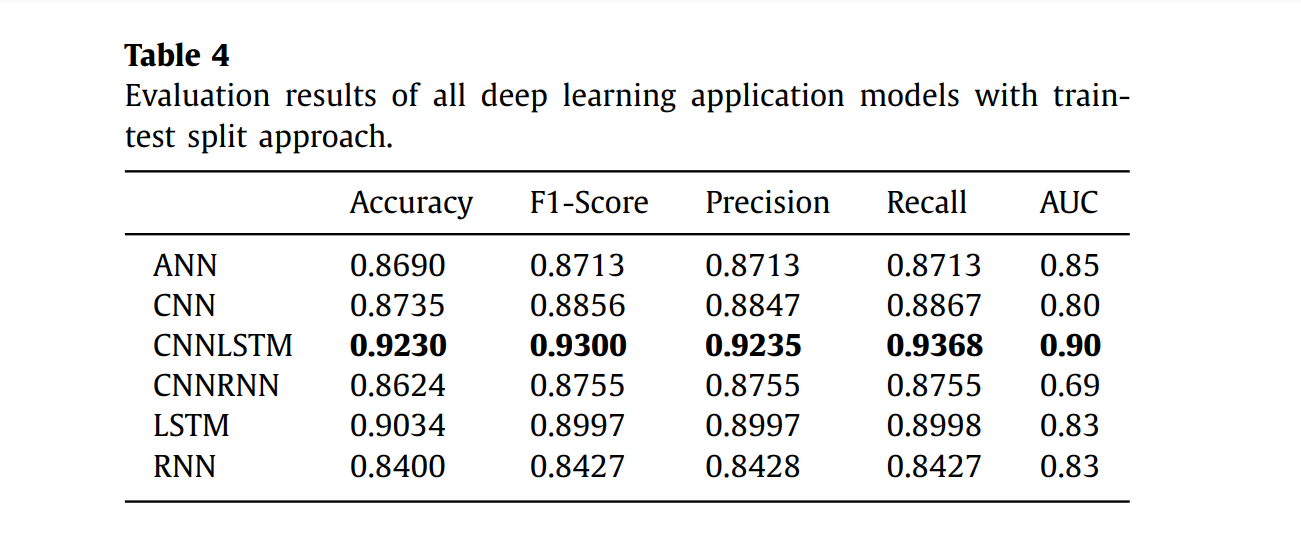

In [11]:
from IPython.display import Image
Image(filename='image1.png')

En comparant les résultats de nos scores avec les reultats trouvés par Hôpital Israelita Albert Einstein à Sao Paulo, Brésil on voit que il y a peu de différences.

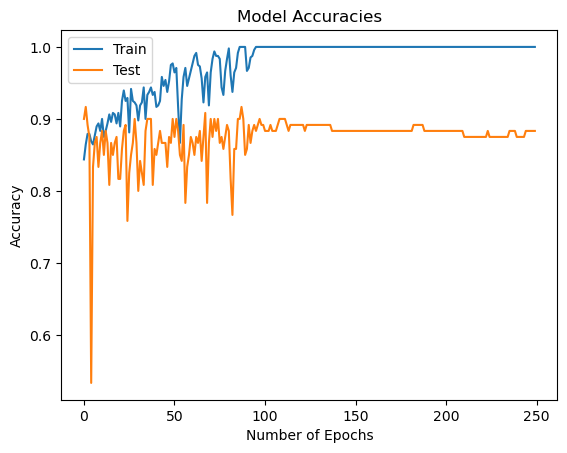

In [12]:
import matplotlib.pyplot as plt
plt.plot(score.history["accuracy"])
plt.plot(score.history["val_accuracy"])
plt.title("Model Accuracies")
plt.ylabel("Accuracy")
plt.xlabel("Number of Epochs")
plt.legend(["Train","Test"], loc="upper left")
plt.show()

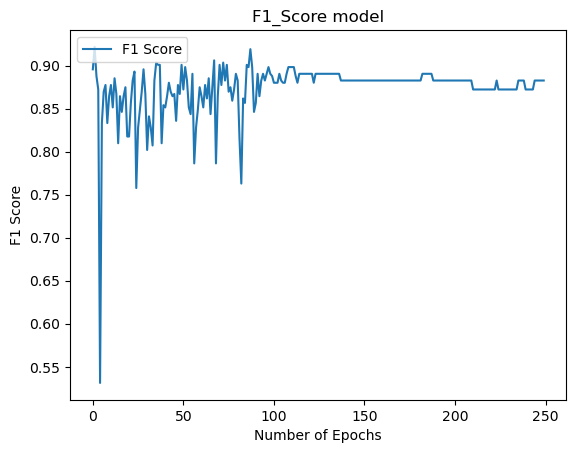

In [13]:
import matplotlib.pyplot as plt

plt.plot(score.history["val_f1_m"])
plt.title("F1_Score model")
plt.ylabel("F1 Score")
plt.xlabel("Number of Epochs")
plt.legend(["F1 Score"], loc="upper left")
plt.show()

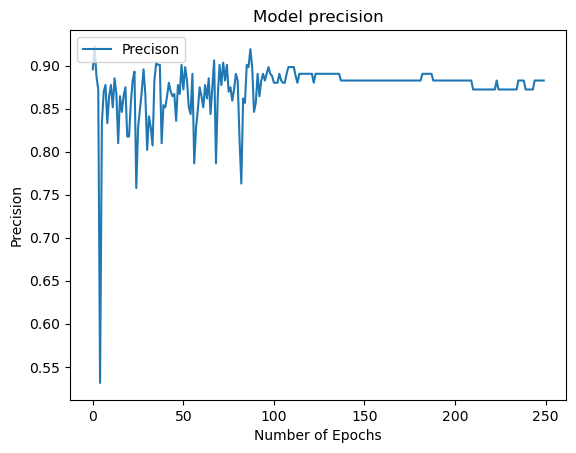

In [14]:
import matplotlib.pyplot as plt

plt.plot(score.history["val_precision_m"])
plt.title("Model precision")
plt.ylabel("Precision")
plt.xlabel("Number of Epochs")
plt.legend(["Precison"], loc="upper left")
plt.show()

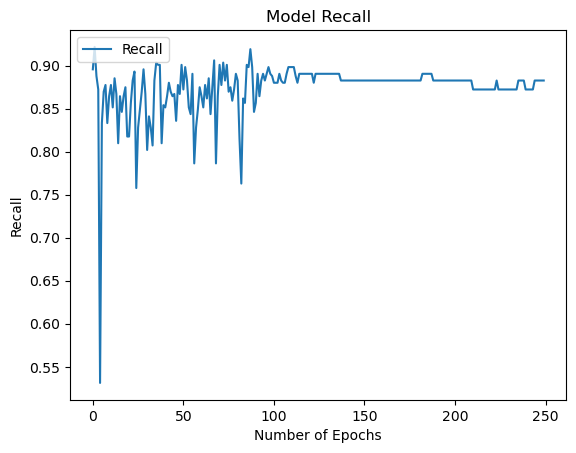

In [15]:
import matplotlib.pyplot as plt

plt.plot(score.history["val_recall_m"])
plt.title("Model Recall")
plt.ylabel("Recall")
plt.xlabel("Number of Epochs")
plt.legend(["Recall"], loc="upper left")
plt.show()

In [16]:
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(nb_classes):
    fpr[i], tpr[i], _ = roc_curve(y_valid[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [17]:
fpr["micro"], tpr["micro"], _ = roc_curve(y_valid.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

C:\Users\akims\AppData\Local\Temp\ipykernel_2228\412812896.py:11: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


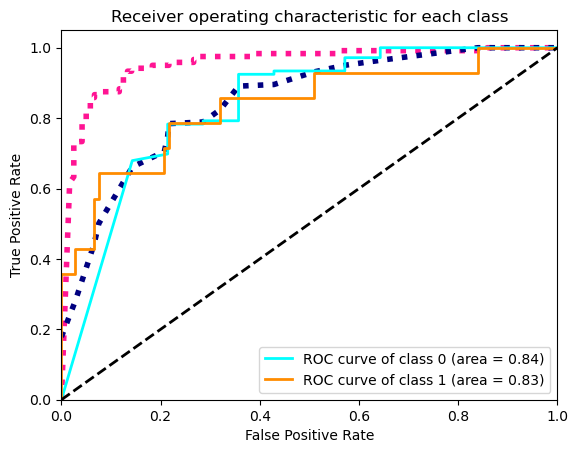

In [18]:
from itertools import cycle
from scipy import interp

lw = 2
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(nb_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(nb_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= nb_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label=''
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label=''
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(nb_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for each class')
plt.legend(loc="lower right")
plt.show()

En comparant le résultat de notre score ROC Curve avec celui trouvés par Hôpital Israelita Albert Einstein à Sao Paulo, Brésil on voit que leur score est meilleur que le notre soit 0.83 contre 0.79